# Models, Data, Learning Problems

Welcome to the first lab of the lecture "Intelligent Data Analysis I". In this lab we start our first data analysis on a concrete problem. We are using Fisher's famous <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris data set</a>. The goal is to classify flowers from the Iris family into one of three species, that look as follows:

<table>
<tr>
<td> <img src="figures/iris_setosa.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_versicolor.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_virginica.jpg" width="200" style="height:150px"/> </td>
</tr>

<tr> 
<td>Iris Setosa</td>
<td>Iris Versicolor</td>
<td>Iris Virginica</td>
</tr>
</table>

Our data set contains 50 flowers from each class, thus 150 in total. There are four features, the length and width of the petal (dt. Kronblatt) and sepal (dt. Kelchblatt) in centimetres.

<img src="figures/petal_sepal.jpg" width="400" style="height:300px"/>

Your goal is to go through the notebook, understand premade code and text as well as filling blanks and exercises left for you. You may also edit the notebook as you wish. A good way to learn is to add comments (lines starting with #) or modifying the code and see what changes.

The data set is distributed with sci-kit learn, the only thing we have to do is to important a function and call it.

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
print(type(X))
print(X.shape)

print("First three rows of data\n {}".format(X[:5]))
print("First three labels: {}".format(y[:5]))

<class 'numpy.ndarray'>
(150, 4)
First three rows of data
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First three labels: [0 0 0 0 0]


 Not only do we get the input matrix $X \in \mathbb{R}^{150 \times 4}$ and target $y \in \mathbb{R}^{150}$, but also meta information such as what the class labels $0, 1, 2$ stand for and what the features (i.e. columns of $X$) correspond to.

In [2]:
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


As a first step we focus our analysis on the first two variables, the sepal length and sepal width. Since we obtain a representation of the data in two dimensions, we are able to plot it. 

In [3]:
X_2 = X[:, :2]
y_2 = y

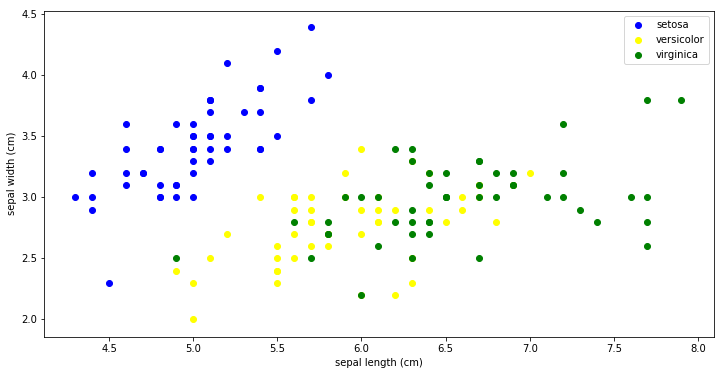

In [4]:
# Configures Jupyter to show graphics in the notebook
%matplotlib inline
import matplotlib.pyplot as plt # standard import

# We write a function so we can reuse it later.
def generate_scatter_plot(X, y):
    class_names = data.target_names
    class_colours = ['blue','yellow','green']

    fig = plt.figure(figsize=(12, 6)) # increase size of plot
    
    for i, class_colour in enumerate(class_colours):
        # plot the points only of this class label
        plt.scatter(X[y == i, 0], X[y == i, 1], c=class_colour, label=class_names[i]) 

    plt.xlabel(data.feature_names[0]) # label the axis
    plt.ylabel(data.feature_names[1])
    plt.legend(loc="best") # with legend

generate_scatter_plot(X_2, y)

We see that we could discriminate the iris setosa linearly from other two species. The linear function could even have a slope of about $1$. Let us substitute the first feature with the difference of the two features.

(150, 2)


Text(0.5, 0, 'sepal length - sepal width')

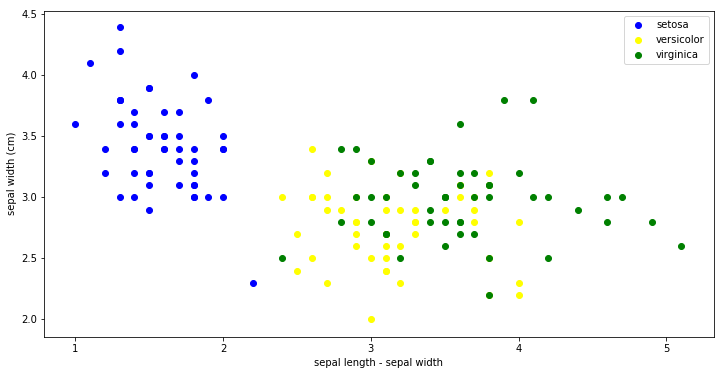

In [5]:
import numpy as np
x_new = X[:, 0] - X[:, 1]
X_new = np.column_stack((x_new, X[:, 1]))
print (X_new.shape)
generate_scatter_plot(X_new, y)
plt.xlabel("sepal length - sepal width")

Remember that our main goal is to find a model,

$$ y_\theta: X \rightarrow Y $$

such that $y_\theta(x)$ models the knowledge we got from our training data plus the inductive bias. The plot gives the decision rule (or part of): "If sepal length - sepal width <= 2.2 => Classify iris setosa".

<b>Exercise 1:</b>


Implement the naive decision rule as given above. If the condition for iris setosa is not fulfilled, classify the result as 'iris versicolor'.

In [6]:
def naive_decision_rule(x):
    # X matrix with 4 dimensional columns
    # returns for each row of X the expected class label (0 = setosa, 1 = versicolor, 2 = virginica)
    #print(x[3])
    if x[0]-x[1]  <= 2.2 : # sepal width
        return 0 # setosa
    else:
        return 1

The following function takes a decision rule (or model) and a matrix of data points to generate the predictions for this matrix.

In [7]:
def predict(model, X):
    """Builds prediction on a matrix X given a model for each data point in a row.
    Returns a flat vector of predictions.
    """
    return np.apply_along_axis(model, axis=1, arr=X)

y_pred = predict(naive_decision_rule, X)
print(y_pred)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The predictions of the first 50 numbers should be zero and one for all others. Now we have to judge the quality of our model, we do this by using the zero-loss function of the lecture.

<b>Exercise 2:</b>

Implement the zero loss function as defined in the lecture,
$$ 
\begin{align}
l(x, y; \theta) &= l_{0/1}(y_\theta(x_i), y_i) = \begin{cases} 0, & \mbox{ if } y_\theta(x_i) = y_i \\ 1, & \mbox{ otherwise } \end{cases} \\
l(X, y, theta) &= \sum_i{ l(x_i, y_i; \theta). }
\end{align}
$$
In lay-man terms one counts how often the label predicted differed from the observed label.

In [8]:
def zero_one_loss(y_pred, y_true):
    # FILL IN
    loss=0
    for i in range(len(y_pred)) :
        if y_pred[i]==y_true[i] :
            loss=loss+0
        else :
            loss=loss+1

    return loss

In [9]:
print('The 0-1-loss of the naive decision rule is ' + str(zero_one_loss(y_pred, y)) + ' (should be 50)')

The 0-1-loss of the naive decision rule is 50 (should be 50)


<b>Exercise 3:</b>

Improve the decision rule to have a maximum number of missclassifications of $10$. As an informal constraint use "Occams Razor" as an inductive bias, i.e. as simplest as possible.

<b>Discussion topic:</b> Why could a complex model with zero missclassifications perform worse in reality (we got out and measure new flowers) than a simple model with more misclassifications?

Text(0.5, 0, 'petal width')

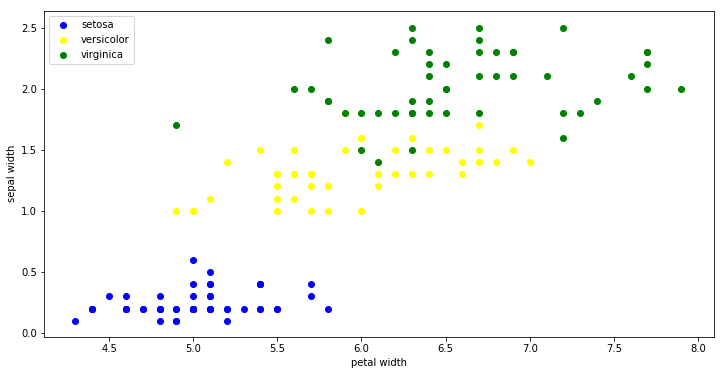

In [10]:
#['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
generate_scatter_plot(np.column_stack((X[:,0],X[:,3])), y)
plt.ylabel("sepal width") 
plt.xlabel("petal width")

In [108]:
# Place for your analysis.
def my_decision_rule(x):
    # FILL IN
     #print(x[3])
    if x[3] <= 0.75 : # sepal width
        return 0 # setosa
    elif x[3] >= 0.75 and x[3] <= 1.65 : # sepal width
        return 1 # versicolor
    elif x[3] > 1.65 and x[3] < 2.65  : # sepal width
        return 2 # virginica
    else:
        return -1

In [109]:
# Evaluation script
y_pred = predict(my_decision_rule, X)
print (y_pred)
loss = zero_one_loss(y_pred, y)
print ("Your loss {}.".format(loss))

if loss <= 10:
    print("You have made it!")
else:
    print("Uhm, try again. Maybe you have flipped some class?")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Your loss 6.
You have made it!
